В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


In [4]:
#взглянем и на таргет
y_pd = pd.DataFrame(y, columns=['wine_class'])
y_pd

,wine_class
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


Ищем пропуски

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Можем заметить, что пропущенных значений нет и категориальных признаков тоже

Используем функцию `train_test_split()`, разделим выборку на тренировочную и тестовую, и долю тестовой выборки зададим равной 0.3. Так как разбиение осуществляется случайным образом, не забудем зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [6]:
from sklearn.model_selection import train_test_split
np.random.seed(4)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
44,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885.0
104,12.51,1.73,1.98,20.5,85.0,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672.0
82,12.08,1.13,2.51,24.0,78.0,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630.0
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,13.52,3.17,2.72,23.5,97.0,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520.0
120,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0
163,12.96,3.45,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675.0


Stratify было важно использовать, поскольку данные были отсортированы по классам (то есть изначальное y сначала шел класс 0, затем 1 и 2), что искажало бы равномерность распредления данных между train и test, а теперь у нас, что в одной, что в другой выборке соотношение классов совпадает с реальным соотношение по всему датасету.

На тренировочной выборке обучим шесть классификаторов kNN, отличающихся только числом соседей. Для обучения используем только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудем масштабировать признаки, например, при помощи модуля `StandardScaler`.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_sc_train = scaler.fit_transform(X_train)
X_train_s = pd.DataFrame(data=X_sc_train, columns=X.columns)
X_train_s_for_5 = pd.DataFrame(data=X_sc_train) #это для 5 пункта
X_train_s.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.049569,-0.488885,-0.902619,-0.766292,0.542080,1.245308,1.006099,-0.700737,0.919026,0.000179,-0.396882,1.024387,0.433404
1,-0.631980,-0.524937,-1.328999,0.329493,-1.060080,-0.112065,-0.092358,-0.362967,-0.126123,-0.929637,0.279010,1.331445,-0.239636
2,-1.174695,-1.065719,0.554179,1.425277,-1.569858,-0.451409,-0.438169,0.312574,-0.278144,-1.257286,1.419577,0.145087,-0.372348
3,-0.278584,0.322289,0.447584,0.799115,0.906207,-1.333702,-0.661929,-1.038508,-0.544182,2.550529,-2.086611,-1.599557,-0.846319
4,1.728198,-0.398754,0.092268,-2.331698,0.177952,1.754324,1.657036,-0.616295,2.686277,1.089391,0.954901,0.535887,2.525197


In [8]:
#проверим, те ли столбцы я выбрала для 5 пункта (alcohol и magnesium)
X_train_s_for_5 = pd.DataFrame(data=X_sc_train)
X_train_s_for_5[[0, 4]]

,0,4
0,0.049569,0.542080
1,-0.631980,-1.060080
2,-1.174695,-1.569858
3,-0.278584,0.906207
4,1.728198,0.177952
...,...,...
119,0.642769,-0.186175
120,-1.969835,-0.259000
121,-0.808678,-0.841603
122,-0.064022,0.469254


In [9]:
#теперь измени масштаб
scaler = StandardScaler()
X_sc = scaler.fit_transform(X_test)
X_test_s = pd.DataFrame(data=X_sc, columns=X.columns)
X_test_s.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-1.401356,-0.232814,1.525457,2.456809,-0.532284,-0.334707,0.164438,1.620511,0.102805,-0.864747,0.250644,-0.234978,-0.904051
1,0.876394,-0.856512,0.415500,-0.801889,0.510558,1.498698,1.561343,-1.242573,0.533390,0.699619,-0.146853,0.390015,1.752420
2,0.935403,-0.437743,1.129044,-0.691425,0.966801,0.921247,0.701709,0.225675,-0.020219,0.493782,1.045639,0.477223,2.044340
3,0.109276,-0.794142,-1.170154,-1.133282,-0.141218,0.055072,0.555180,-0.581861,-0.496938,-0.576574,1.294074,0.128390,0.892878
4,0.215492,1.050221,-0.971947,0.385602,0.119492,-1.244192,-1.486451,0.519325,-0.604584,-0.453071,-1.587781,-1.339617,0.276603


In [10]:
#обучаем, делаем предикт и проверяем долю правильных ответов
l = []
for k in [1, 3, 5, 10, 15, 25]:
    clf = KNeighborsClassifier(n_neighbors=k, p=2)
    l.append(clf)                                                                 
    clf.fit(X_train_s[['alcohol', 'magnesium']], y_train) 
    y_predicted = clf.predict(X_test_s[['alcohol', 'magnesium']])
    print(f"Доля правильных ответов при k = {k}:", np.mean(y_test == y_predicted))
    

Доля правильных ответов при k = 1: 0.7037037037037037
Доля правильных ответов при k = 3: 0.8333333333333334
Доля правильных ответов при k = 5: 0.8333333333333334
Доля правильных ответов при k = 10: 0.7777777777777778
Доля правильных ответов при k = 15: 0.7407407407407407
Доля правильных ответов при k = 25: 0.7222222222222222


Установим библиотеку `mlxtend`

In [ ]:
#все установила, но удалила ячейку, потому что уж очень длинная выкладка была
!pip install mlxtend

In [12]:
import mlxtend

Визуализируем решающие поверхности обученных классификаторов.

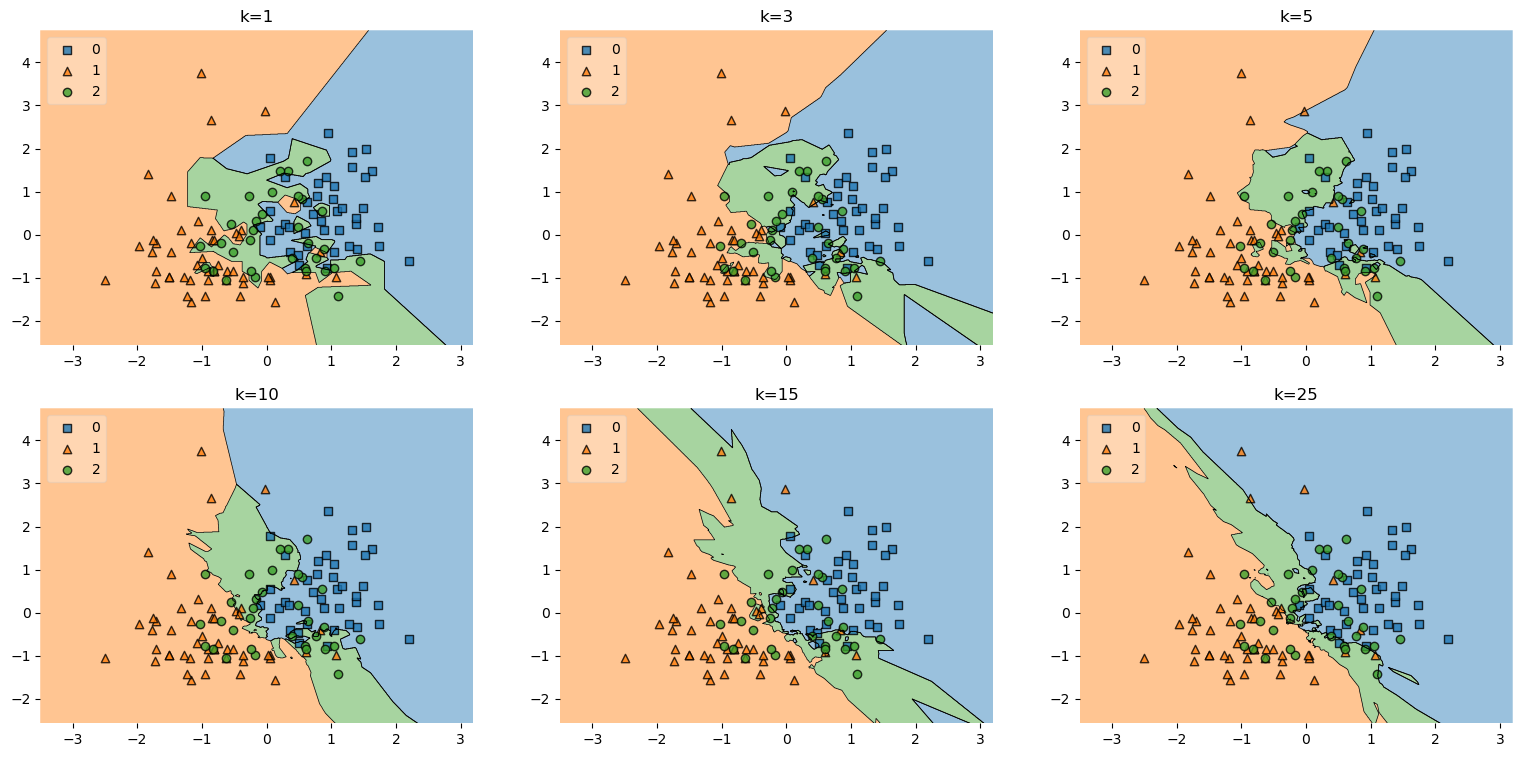

In [13]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(19,9))

labels = ['k=1', 'k=3', 'k=5', 'k=10', 'k=15', 'k=25']
for clf, lab, grd in zip(l,
                         labels,
                         itertools.product((0, 1), (0, 1, 2), repeat=1)):
    clf.fit(X_train_s_for_5[[0, 4]], y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_sc_train[:, [0, 4]], y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

<a href="https://imgbb.com/"><img src="https://i.ibb.co/749bMX1/fe7297e85588b8aa3e55ffa6e1e9a3b2.jpg" alt="fe7297e85588b8aa3e55ffa6e1e9a3b2" border="0"></a>

На мой взгляд оптимально будет испльзовать для обучений 3 или 5 соседей, решающие поверхности для графиков очень похожи, они лучше разделяют классы. Очевидно, что при k=1 модель будет намного сильнее подстраиваться под выборку, что мы и видим на первом графике, где отдельные группы выбросов отнесены в нужный класс 

Попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

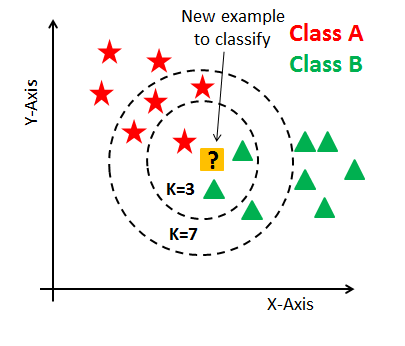

In [14]:
def euc_dist(a, b):
     return np.sqrt(np.sum((a - b) ** 2))

In [15]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.Y = y

    def predict(self, X):
        y_pred = np.array([self.count_distance(x) for x in X])
        return y_pred

    def count_distance(self, x):
        dist = [euc_dist(x, x_train) for x_train in self.X]
        ind = np.argsort(dist)[:self.k] 
        k_lab = [self.Y[i] for i in ind]
        k_labs, count = np.unique(k_lab, return_counts=True)
        k_most_com = k_labs[count.argmax()]
        return k_most_com
        
        

In [16]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [17]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

Рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [18]:
data = pd.read_csv('diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

In [19]:
data.isna().sum() #пропусков нет

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [20]:
#К бессмысленным можно отнести столбец unnamed:0
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Выведим матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

In [21]:
data.corrwith(data['price'], numeric_only=True)

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
dtype: float64

Как мы видим, корреляция цены почти со всеми вещественными признаками (кроме depth и table) близка к 1, что говорит о том, что свзяь между ценой и этими признаками может быть близка к линейной. Наибольшая корреляция price наблюдается с carat.

In [40]:
#так же выведем отдельной корреляцию всех со всеми
data.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируем категориальные переменные при помощи OneHot-кодирования.

In [22]:
data_numeric = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=True)
data_numeric

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


Разделим выборку на тренировочную и тестовую. Долю тестовой выборки укажим равной 0.3. Не забудем про параметр `stratify`.

In [23]:
from sklearn.model_selection import train_test_split
np.random.seed(4)
X_train, X_test, y_train, y_test = train_test_split(data_numeric.drop('price', axis=1), 
                                                    data_numeric['price'], train_size=0.7)
X_train

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
9077,0.83,58.2,59.0,6.19,6.24,3.62,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
48769,0.60,60.4,57.0,5.49,5.53,3.33,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
37238,0.40,62.5,58.0,4.73,4.65,2.93,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
15565,1.06,61.8,57.0,6.56,6.52,4.04,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
38295,0.30,60.6,57.0,4.34,4.37,2.63,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11863,1.08,62.9,57.0,6.54,6.53,4.11,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
49861,0.57,61.6,58.0,5.39,5.35,3.31,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
27063,2.01,62.0,61.0,8.10,8.04,5.00,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8366,0.90,58.8,61.0,6.28,6.30,3.70,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


Масштабируем вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train[['carat', 'depth', 'table', 'x', 'y', 'z']])
X_train_s = pd.DataFrame(data=X_train_s, columns=['carat', 'depth', 'table', 'x', 'y', 'z'])
X_train_s

,carat,depth,table,x,y,z
0,0.065414,-2.474756,0.690684,0.407054,0.449315,0.117225
1,-0.417318,-0.941183,-0.204409,-0.215027,-0.181901,-0.298493
2,-0.837085,0.522681,0.243137,-0.890429,-0.964255,-0.871896
3,0.548146,0.034727,-0.204409,0.735868,0.698246,0.719299
4,-1.046968,-0.801768,-0.204409,-1.237017,-1.213185,-1.301949
...,...,...,...,...,...,...
37753,0.590123,0.801513,-0.204409,0.718094,0.707136,0.819644
37754,-0.480283,-0.104689,0.243137,-0.303895,-0.341928,-0.327163
37755,2.542040,0.174142,1.585777,2.104446,2.049584,2.095467
37756,0.212333,-2.056509,1.585777,0.487036,0.502658,0.231906


Оценим линейную регрессию на тренировочной выборке. Выведем среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
y_pred_train

array([ 5212.45086087,  3042.18389937,  1119.62622236, ...,
       14155.02080349,  4999.48143872,  6392.3892924 ])

In [26]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, y_pred_train)

1295369.119596327

In [27]:
MSE_linreg = mean_squared_error(y_test, y_pred_test)
MSE_linreg

1234805.4035789024

Найдем полученные оценки коэффициентов

In [28]:
pd.DataFrame(reg.coef_, index=X_train.columns, columns=['Коэфы'])

,Коэфы
carat,11196.785002
depth,-59.714327
table,-30.500560
x,-1011.568222
y,71.226539
z,-99.571555
cut_Good,565.402525
cut_Ideal,808.525398
cut_Premium,752.991871
cut_Very Good,705.068307


Методом присатального взгляда можем заметить, что это переменные carat и x.

Обучим Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. 

In [29]:
from sklearn import linear_model

clf = linear_model.Lasso(alpha=10)
clf.fit(X_train, y_train)
y_pred_lasso_train = clf.predict(X_train)
y_pred_lasso_test = clf.predict(X_test)

clf1 = linear_model.Ridge(alpha=10)
clf1.fit(X_train, y_train)
y_pred_ridge_train = clf1.predict(X_train)
y_pred_ridge_test = clf1.predict(X_test)

In [30]:
clf.coef_ #как мы видим некоторые коэфы занулились, что может говорить о том, что эти переменные можно убрать в силу мультикол.

array([ 9542.60028058,   -99.66888958,   -54.29842907,  -424.22723854,
          -0.        ,    -0.        ,    -0.        ,   147.34531411,
          81.35430475,    82.01436278,     0.        ,    -0.        ,
        -119.47147382,  -607.8197232 ,  -982.72351637, -1763.93545349,
        1480.28312106,   130.5758856 ,  -655.09298473,   959.0872881 ,
         711.45808663,  1293.17803659,  1284.94355301])

In [31]:
clf1.coef_

array([10873.97720658,   -57.99746688,   -31.14130779,  -903.48306593,
          79.84214123,   -90.61365945,   588.39830082,   838.40234044,
         780.21625736,   737.46235168,  -205.04890851,  -273.27665692,
        -472.48842877,  -976.39681712, -1450.41955342, -2342.16470746,
        4885.62044186,  3215.92190307,  2270.12401724,  4121.35248413,
        3812.77077539,  4532.44850885,  4467.34161773])

Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучим Lasso- и Ridge-регрессии и построим график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

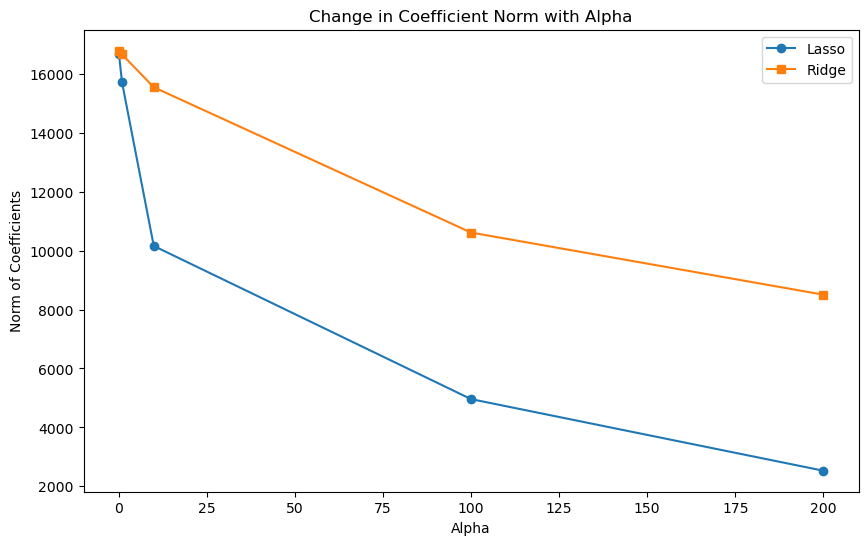

In [32]:
l = []
r = []

for i in [0.1, 1, 10, 100, 200]:
    lasso = linear_model.Lasso(alpha=i)
    lasso.fit(X_train, y_train)
    l.append(np.linalg.norm(lasso.coef_))
    
    ridge = linear_model.Ridge(alpha=i)
    ridge.fit(X_train, y_train)
    r.append(np.linalg.norm(ridge.coef_))

plt.figure(figsize=(10, 6))
plt.plot([0.1, 1, 10, 100, 200], l, label="Lasso", marker='o')
plt.plot([0.1, 1, 10, 100, 200], r, label="Ridge", marker='s')
#plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Norm of Coefficients')
plt.title('Change in Coefficient Norm with Alpha')
plt.legend()
plt.show()

Как видно из график лассо регрессия значительнее уменьшает веса. Как мы видели ранее лассо регрессия позволила занулить коэфициенты перед некоторыми признаками, которые были для нашего анализа не важны, например в силу мультиколлинеарности. За счет этого свойства модели, мы можем выбрать наиболее информативные признаки и избежать переобучения.

В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`.

Усредним ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и найдем то значение, которое даёт наибольшее качество.

In [42]:
a = [0.1, 1, 10, 100, 200]
lcv = linear_model.LassoCV(alphas=[0.001, 0.05, 0.1, 0.5, 1, 5, 10, 20, 100, 200], cv=5, max_iter=3000)
lcv.fit(X_train, y_train)

matr = lcv.mse_path_
ind = np.argmin(matr.mean(axis=1))
a = lcv.alphas_[ind]
a

0.1

Обучим итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке.

In [45]:
lasso = linear_model.Lasso(alpha=0.1)

lasso.fit(X_train, y_train)
pd.DataFrame(lasso.coef_, index=X_train.columns, columns=['Коэфы'])

,Коэфы
carat,11180.253399
depth,-60.810070
table,-30.814946
x,-1004.033929
y,63.714781
z,-90.468914
cut_Good,555.248421
cut_Ideal,798.590083
cut_Premium,742.881256
cut_Very Good,695.782063


Сделаем предсказания обученной Lasso-регрессии на тестовой выборке и сравним среднеквадратичную ошибку с ошибкой обычной линейной регрессии.

In [44]:
y_pred_test_l = lasso.predict(X_test)
MSE_lasso = mean_squared_error(y_test, y_pred_test_l)
MSE_lasso

1233645.9337096002

In [36]:
MSE_linreg

1234805.4035789024

In [37]:
MSE_lasso < MSE_linreg

True

Лассо модель оказалась совсем немного лучше регрессии, поскольку включает в себя регулярицаци, и как мы видим в данном задании не то, чтобы результат сильно улучшился, но раз хотя бы чем-то штраф за слишком большие веса нам помог, то лучше лассо в данном случае выбрать.